# Task 1
## Classify MNIST dataset using Neural Networks

### 1. loading Dataset
There are built in datasets from ```tensorflow.keras.datasets``` to load our dataset. we use the ```mnist.load_data()``` function.
Returns: 2 **tuples**

- x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32) or (num_samples, 32, 32, 3) based on the image_data_format backend setting of either channels_first or channels_last respectively.
- y_train, y_test: uint8 array of category labels (integers in range 0-9) with shape (num_samples, 1).

In [77]:
from tensorflow.keras.datasets import mnist

# loads the MNIST training and test dataset 
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

### 2. Inspecting Dataset

In [78]:
#Display the number of samples in x_train, x_test, y_train, y_test
print("Dimensions of x_train", str(x_train.shape))

print("The number of samples in training data: ", str(len(x_train)))
print("The number of labels in training data: ", str(len(y_train)))
print("The number of samples in test data: ", str(len(x_test)))
print("The number of labels in test data: ", str(len(y_test)))

print("The shape of one image: ", x_train[0].shape)

Dimensions of x_train (60000, 28, 28)
The number of samples in training data:  60000
The number of labels in training data:  60000
The number of samples in test data:  10000
The number of labels in test data:  10000
The shape of one image:  (28, 28)


### 3. Visualizing images in dataset

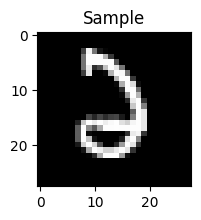

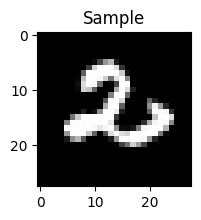

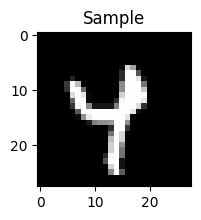

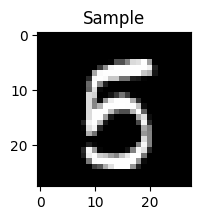

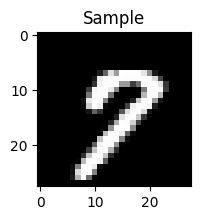

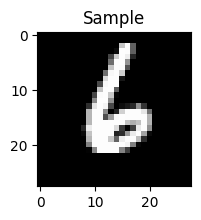

In [79]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

def imshow(title, image = None, size = None):
    if image.any():
        w, h = image.shape[0] , image.shape[1]
        aspect_ratio = w/h
        plt.figure(figsize=(size * aspect_ratio, size))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.show()
    else:
        print('Image Not Found')
        
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow("Sample", img, size = 2) 

### 4. Preprocessing Dataset
Before passing to our neural network for training, we need to prepare it firstly:

1-Reshaping our data by adding a 4th Dimension 

2-Changing our datatype from uint8 to float32

3-Normalizing our data to values between 0 and 1

4-One hot encoding

In [80]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

print("Input Size: ", input_size)

#resize 
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

#normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

num_labels = len(np.unique(y_train))

#One-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Input Size:  784


- At this point, the labels are in digits format, **0** to **9**.


- This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.


- A more suitable format is called a one-hot vector, a **10-dim** vector with all elements **0**, except for the index of the digit class.


- For example, if the label is **2**, the equivalent one-hot vector is **[0,0,1,0,0,0,0,0,0,0]**. The first label has index **0**.


## 5. Designing the model architecture 

In [81]:
#setting network parameters
epochs = 20
batch_size = 128
hidden_units = 256
dropout = 0.45

- Since a Dense layer is a linear operation, a sequence of Dense layers can only approximate a linear function.


- The problem is that the MNIST digit classification is inherently a non-linear process. Inserting a relu activation between Dense layers will enable MLPs to model non-linear mappings.


- relu or Rectified Linear Unit (ReLU) is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

In [82]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.optimizers import Adam, RMSprop

#model is a 3-layers MLP  with ReLU and dropout after each layer 
model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

### View model summary 

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

- The above listing shows the model summary of the proposed network. It requires a total of 269,322 parameters.


- This is substantial considering that we have a simple task of classifying MNIST digits. So, MLPs are not parameter efficient.


- The total number of parameters required can be computed as follows:

    -From input to Dense layer: 784 × 256 + 256 = 200,960.
    
    -From first Dense to second Dense: 256 × 256 + 256 = 65,792.
    
    -From second Dense to the output layer: 10 × 256 + 10 = 2,570.
    
    -The total is 200,690 + 65,972 + 2,570 = 269,322.

## 6. Compile the model 

In [84]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## 7. Train the model

In [93]:
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0530 - accuracy: 0.9827
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0528 - accuracy: 0.9827
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0506 - accuracy: 0.9833
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0491 - accuracy: 0.9843
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0472 - accuracy: 0.9850
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0471 - accuracy: 0.9849
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0480 - accuracy: 0.9843
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0453 - accuracy: 0.9853
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0457 - accuracy: 0.9853
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0461 - accuracy: 0.9850

## 8. Evaluating The Model

In [94]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9840

Test accuracy: 98.4%


In [97]:
import os 
print(os.getcwd())

D:\pythonAAM\AI\MODERN~1\UDEMY_~1.IR\UDEMY-~1\246FC~1.DOW\1A1D6~1.1MO\MODERN~1\DEEPLE~1
